<center>
<img src="https://whatfix.com/blog/wp-content/uploads/2022/09/employee-churn.png">
   
# Андан на экономе: Групповой проект

</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

/Users/olegchernikov/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Выбор темы

Мы выбрали датасет "Employee Turnover", на основе которого мы бы хотели выявить основные факторы, кторые влияют на решение работника об уходе из компании. В настоящее время данная тема является актуальной для любого предприятия, так как работодателям всегда важно анализировать ситуацию на рынке труда и находить оптимальные условия труда для снижения уровня текучести кадров.

# 2. Сбор данных и Предварительныя обработка

Данный датасет мы взяли с сайта kaggle. База данных принадлежит крупной американской компании, отдел кадров которой собрал данные о почти 10 000 сотрудниках, которые покинули компанию в период с 2016 по 2020 год. Они использовали информацию из собеседований, обзоров эффективности и записей сотрудников.

### Описание переменных 

* "department" - отдел, к которому принадлежит сотрудник.
* "promoted" - 1, если работник был повышен в должности в предыдущие 24 месяца, 0 в противном случае.
* "review" - совокупная оценка, которую сотрудник получил в результате последней оценки его производительности.
* "projects" - в скольких проектах участвует сотрудник.
* "salary" - по соображениям конфиденциальности заработная плата выходит на три уровня: низкая, средняя, высокая.
* "tenure" - сколько лет сотрудник работает в компании.
* "satisfaction" - мера удовлетворенности сотрудников по результатам опросов.
* "bonus" - 1, если сотрудник получил премию за предыдущие 24 месяца, 0 в противном случае.
* "avg_hrs_month" - среднее количество часов, которое сотрудник работал в месяц.
* "left" - "да", если сотрудник в конечном итоге ушел, "нет" в противном случае.

In [2]:
df = pd.read_csv('employee_churn_data.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [3]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

В данных нет пропусков, поэтому дополнительной обработки не требуется.

# 3. Визуализация  и проверка гипотез

## Проверяем корреляцию между переменными

In [4]:
c = df.corr()
c

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


В общем и целом, признаки почти не коррелируют. Однако заметна очень сильная корреляция между tenure и avg_hrs_month.

Посмотрим на эти переменные поближе.

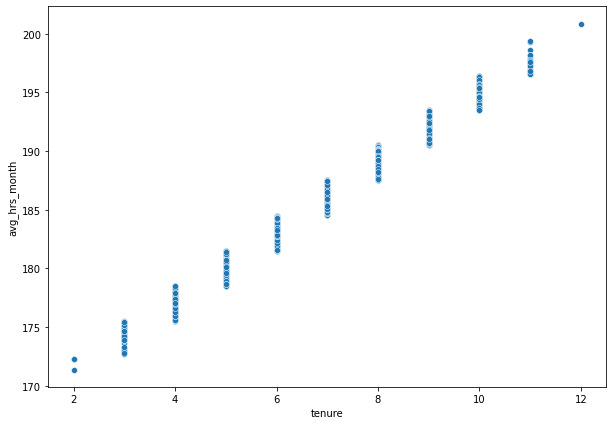

In [5]:
# Для начала посмотрим на их совместные график

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='tenure', y='avg_hrs_month');

Дейсвительно наблюдается четкая положительная линейная зависимость.

Теперь давайте посмотрим на количественную связь этих двух переменных, построив линейную регрессию.

In [6]:
# Построим линейную регрессию, чтобы посмотреть количественную связь между пременными:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

y = np.array(df['avg_hrs_month']).reshape(-1, 1)

X = np.array(df['tenure']).reshape(-1, 1)

lr.fit(X, y)

print(f'w0: {lr.intercept_[0]}')
print(f'w1: {lr.coef_[0][0]}')

w0: 165.87350177674287
w1: 2.8657017484394425


Получается, что за каждый дополнительный год работы в компании, работник работает примерно на 3 часа в месяц больше (коэффициент w1). 

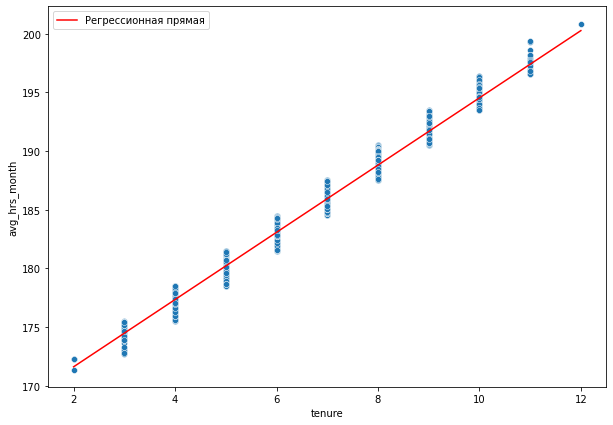

In [7]:
# построим регрессионную прямую на графике:

plt.figure(figsize=(10, 7))

grid = np.linspace(2, 12, 100)
line = lr.predict(grid[:, np.newaxis])

plt.plot(grid, line, label='Регрессионная прямая', color='red')
sns.scatterplot(data=df, x='tenure', y='avg_hrs_month')
plt.legend();

In [8]:
from sklearn.metrics import r2_score

print(f'R2: {r2_score(y, lr.predict(X))}')

R2: 0.9576929819139308


Но это еще не все, с помощью бутстрапа давайте посмотрим на распределение корреляции между tenure и avg_hrs_month, чтобы посмотреть на примерный диапазон корреляции. 

In [9]:
from sklearn.utils import resample

samples_1 = df['tenure']
samples_2 = df['avg_hrs_month']

corr = samples_1.corr(samples_2)

results = []

for nrepeat in range(1000):
    sample_1 = resample(samples_1)
    sample_2 = resample(samples_2)
    results.append(sample_1.corr(sample_2))
    
results = pd.Series(results)
pval = 2*min(np.array([corr > results]).mean(), np.array([corr < results]).mean())

print('Статистика бутстрапа:')
print(f'исходно: {corr}')
print(f'смещение: {results.mean() - corr: .18f}')
print(f'станд. ошибка: {results.std()}')
print(f'p-value: {pval}')

Статистика бутстрапа:
исходно: 0.9786178937225347
смещение:  0.000027883798173867
станд. ошибка: 0.0005806262221719766
p-value: 0.966


Видно, что смещение и стандартная ошибка ничтожно малы, а p-value близко к 1, поэтому заключаем, что истинная корреляция действительно находится в районе 1. 

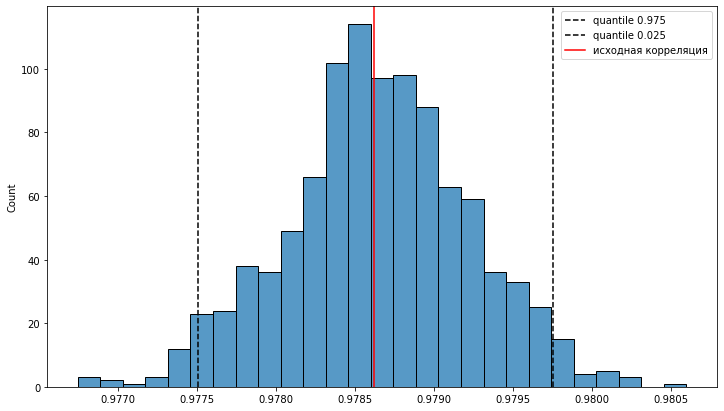

In [10]:
# В дополнение нарисуем график бутстраповского распредления с исходной корреляцией и квантилями уровня 0.025 и 0.0975

right_q = results.quantile(0.975)
left_q = results.quantile(0.025)
p_value = np.array([samples_1.corr(samples_2) > results]).mean()


plt.figure(figsize=(12, 7))
sns.histplot(results)
plt.axvline(right_q, ls='--', color='black', label='quantile 0.975')
plt.axvline(left_q, ls='--', color='black', label='quantile 0.025')
plt.axvline(samples_1.corr(samples_2), color='red', label='исходная корреляция')
plt.legend();

## Анализ зависимой и независимых переменных

### Как доброкачественный исследователь заранее установим уровень значимости для всех гипотез:

* alpha = 0.05

В этом разделе проведем анализ зависимой или целейвой перменной (left) и всеми остальными переменными. 

Посмотрим на общую таблицу между left и остальными независимыми переменными, показывающую среднее и медиану по всем департаментам.

In [11]:
p_t_1 = df.pivot_table(index='department', columns='left', aggfunc='mean')
p_t_1

avg_hrs_month                 bonus            projects            \
left                   no         yes        no       yes        no       yes   
department                                                                      
IT             184.718036  185.051092  0.223577  0.218182  3.280488  3.309091   
admin          184.279012  185.200044  0.190789  0.176471  3.279605  3.277311   
engineering    184.687567  184.702814  0.215941  0.199085  3.266914  3.256293   
finance        184.204821  184.838697  0.227891  0.240741  3.292517  3.296296   
logistics      184.738019  184.257711  0.208835  0.207207  3.253012  3.324324   
marketing      184.511956  184.373363  0.223614  0.209877  3.288014  3.263374   
operations     184.800634  184.840330  0.207182  0.206422  3.282689  3.243119   
retail         184.683092  184.853169  0.218692  0.218684  3.263551  3.271762   
sales          184.645990  184.543420  0.220654  0.189944  3.302377  3.245810   
support        184.581743  184.793479  0.204589  0.202830  3.267686  3.268868   

             promoted              review           satisfaction            \
left               no       yes        no       yes           no       yes   
department                                                                   
IT           0.028455  0.009091  0.631078  0.685021     0.521494  0.503126   
admin        0.036184  0.042017  0.632829  0.683507     0.521383  0.514491   
engineering  0.026877  0.013730  0.633259  0.693421     0.510464  0.491315   
finance      0.054422  0.027778  0.637610  0.702093     0.505762  0.473831   
logistics    0.024096  0.009009  0.631618  0.705420     0.491691  0.496209   
marketing    0.051878  0.020576  0.641569  0.694788     0.500591  0.506597   
operations   0.035912  0.013761  0.637108  0.693970     0.506420  0.500138   
retail       0.037383  0.025478  0.632577  0.690079     0.501145  0.506457   
sales        0.026746  0.026071  0.635219  0.692769     0.504261  0.505169   
support      0.036329  0.018868  0.636953  0.683805     0.502094  0.517643   

               tenure            
left               no       yes  
department                       
IT           6.589431  6.654545  
admin        6.417763  6.705882  
engineering  6.552363  6.572082  
finance      6.384354  6.592593  
logistics    6.562249  6.450450  
marketing    6.522361  6.460905  
operations   6.597606  6.635321  
retail       6.572897  6.632696  
sales        6.546062  6.510242  
support      6.541109  6.622642

In [12]:
p_t_2 = df.pivot_table(index='department', columns='left', aggfunc='median')
p_t_2

avg_hrs_month             bonus     projects     promoted      \
left                   no         yes    no yes       no yes       no yes   
department                                                                  
IT             184.053201  186.686006     0   0        3   3        0   0   
admin          183.397197  186.920696     0   0        3   3        0   0   
engineering    184.248149  186.317731     0   0        3   3        0   0   
finance        183.837452  185.938101     0   0        3   3        0   0   
logistics      184.112418  185.366300     0   0        3   3        0   0   
marketing      183.728915  185.819590     0   0        3   3        0   0   
operations     184.332114  186.184013     0   0        3   3        0   0   
retail         184.093481  186.314061     0   0        3   3        0   0   
sales          184.110095  186.360522     0   0        3   3        0   0   
support        184.030484  186.725031     0   0        3   3        0   0   

               review           satisfaction           tenure       
left               no       yes           no       yes     no  yes  
department                                                          
IT           0.624653  0.689516     0.512767  0.461514    6.0  7.0  
admin        0.631858  0.683831     0.529373  0.501404    6.0  7.0  
engineering  0.630666  0.698643     0.507769  0.471104    6.0  7.0  
finance      0.641840  0.708402     0.502088  0.463131    6.0  7.0  
logistics    0.634633  0.708827     0.485482  0.490095    6.0  7.0  
marketing    0.639058  0.709502     0.507515  0.503920    6.0  7.0  
operations   0.635065  0.702550     0.504704  0.495719    6.0  7.0  
retail       0.635098  0.694396     0.502068  0.494263    6.0  7.0  
sales        0.633836  0.695902     0.502675  0.494571    6.0  7.0  
support      0.636948  0.685442     0.492779  0.516237    6.0  7.0

In [13]:
p_t_3 = df.pivot_table(index='department', columns='left', aggfunc='var')
p_t_3

avg_hrs_month                bonus            projects            \
left                   no        yes        no       yes        no       yes   
department                                                                     
IT              19.513373  12.584069  0.174299  0.172143  0.390393  0.288907   
admin           17.875534  15.103781  0.154898  0.146560  0.314302  0.303803   
engineering     18.215963  13.785365  0.169467  0.159816  0.338709  0.356182   
finance         16.820199  14.378567  0.176557  0.184493  0.378306  0.416061   
logistics       17.995825  16.512413  0.165889  0.165766  0.359114  0.366585   
marketing       18.646060  15.600269  0.173922  0.166514  0.334462  0.318777   
operations      19.263198  13.154689  0.164409  0.164189  0.324622  0.336159   
retail          17.617733  13.934392  0.171025  0.171225  0.315883  0.325988   
sales           18.684773  15.567088  0.172094  0.154152  0.344931  0.327524   
support         17.212560  15.187202  0.163044  0.162456  0.326674  0.330211   

             promoted              review           satisfaction            \
left               no       yes        no       yes           no       yes   
department                                                                   
IT           0.027758  0.009091  0.005987  0.009802     0.025440  0.025320   
admin        0.034990  0.040593  0.005189  0.009778     0.026652  0.024119   
engineering  0.026179  0.013573  0.005700  0.009010     0.025813  0.023613   
finance      0.051636  0.027259  0.004942  0.007474     0.024712  0.027073   
logistics    0.023611  0.009009  0.006607  0.007794     0.028164  0.021398   
marketing    0.049275  0.020236  0.005876  0.010049     0.025010  0.025634   
operations   0.034654  0.013603  0.005501  0.007856     0.026099  0.023700   
retail       0.036019  0.024881  0.005625  0.009801     0.025616  0.024933   
sales        0.026050  0.025438  0.005511  0.009361     0.025320  0.023935   
support      0.035076  0.018600  0.005153  0.009295     0.023855  0.021622   

               tenure            
left               no       yes  
department                       
IT           2.242990  1.530942  
admin        2.079023  1.802592  
engineering  2.151012  1.612338  
finance      1.896137  1.739010  
logistics    2.029376  2.049795  
marketing    2.185431  1.803217  
operations   2.224105  1.583945  
retail       2.037244  1.717993  
sales        2.160330  1.802600  
support      1.988249  1.771618

Есть несколько интересных зависимостей, которые могут оказаться статистически значимыми. Давайте посмотрим на признаки поподробнее. 

### left и department

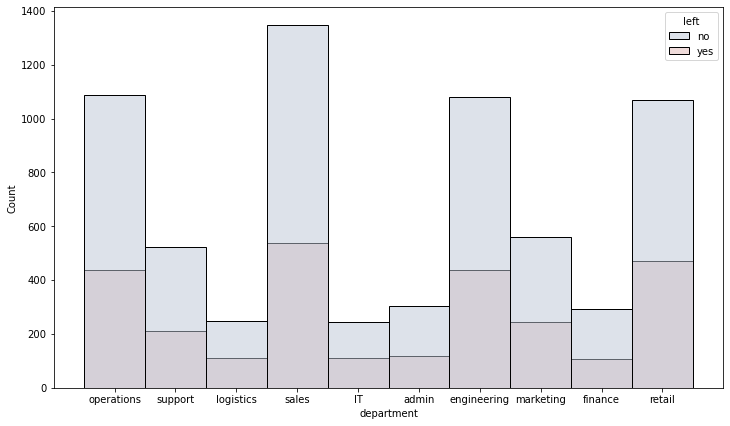

In [14]:
# начнем с графика, который показывает сколько людей ушло в каждом департаменте.

plt.subplots(figsize=(12,7))
sns.histplot(data=df, x='department', hue='left', palette='vlag', multiple='layer');

Вывод: столбчатая диаграмма показывает зависимость текучести кадров от департамента, в котором работает сотрудник. Из нее следует вывод, что везде сохраняется примерно одна и та же пропорция ушел/остался. Количество уволившихся работников в департаментах составляет около 30 % от общего количества сотрудников. Следовательно, большая часть работников в каждом департаменте принимает решение продолжать работать и не уходить с места работы. Мы бы хотели проверить гипотезу о том, что люди, которые ушли, составляют 30% от общего количества сотрудников. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} p = 0.3 \\
&H_1: \hspace{2mm} p \ne 0.3 
\end{aligned}
$$

In [15]:
hypothesis = 0.3 # нулевая гипотеза

d = df.groupby('department')['left'].value_counts().unstack()
d['%_left'] = d['yes'] / (d['yes'] + d['no'])
left = scs.norm.cdf((d['%_left'] - hypothesis) / np.sqrt((hypothesis*(1 - hypothesis)) / (d['yes'] + d['no'])))
right = 1-scs.norm.cdf((d['%_left'] - hypothesis) / np.sqrt((hypothesis*(1 - hypothesis)) / (d['yes'] + d['no'])))
mins = np.array([min(x, y) for x, y in zip(left, right)]) # смотрим какой из хвостов меньше
d['p_value'] = 2*mins
d

left,no,yes,%_left,p_value
department,,,,
IT,246,110,0.308989,0.711310
admin,304,119,0.281324,0.401919
engineering,1079,437,0.288259,0.318469
finance,294,108,0.268657,0.170266
logistics,249,111,0.308333,0.730070
marketing,559,243,0.302993,0.853282
operations,1086,436,0.286465,0.249215
retail,1070,471,0.305646,0.628652
sales,1346,537,0.285183,0.160606


Как видно из последней колонки (p_value), при уровне значимости равном 5% мы не отвергаем нулевую гипотезу ни в одном из департаментов.

In [16]:
# ищем p-value для всей выборки

x = df['left'].replace({'no': 0, 'yes': 1}).values

from statsmodels.stats.weightstats import ztest,zconfint

_, pvalue = ztest(x, value=0.3, alternative='two-sided')
pvalue

0.07899035066238765

Для всей выборки мы также не отвергаем H0

In [17]:
# ищем ДИ

p_hat = x.mean()
alpha = 0.05
z = scs.norm.ppf(1-alpha/2)

p_hat-z*np.sqrt(p_hat*(1-p_hat)/len(x)), p_hat+z*np.sqrt(p_hat*(1-p_hat)/len(x))

(0.28270158646688087, 0.3009462122752575)

### left и avg_hrs_month

Можно заметить, что среднии значения avg_hrs_month для двух категорий практически идентичны, однако их дисперсии сильно разняться. К тому же есть некоторые различия в их медианах. Давайте посмотрим на то, как распределены две категории во всем датасете, чтобы понять структуру данных. 

Коэффициент ассиметрии avg_hrs_month, когда left = no: 0.3535241237538874
Коэффициент ассиметрии avg_hrs_month, когда left = yes: -0.7326483573931042


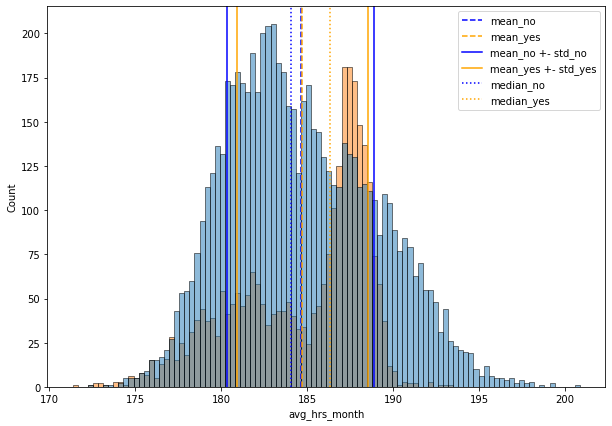

In [18]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='avg_hrs_month', hue='left', bins=100)
mean_no = df[df['left']=='no']['avg_hrs_month'].mean()
mean_yes = df[df['left']=='yes']['avg_hrs_month'].mean()
std_no = df[df['left']=='no']['avg_hrs_month'].std()
std_yes = df[df['left']=='yes']['avg_hrs_month'].std()
median_no = df[df['left']=='no']['avg_hrs_month'].median()
median_yes = df[df['left']=='yes']['avg_hrs_month'].median()
plt.axvline(mean_no, ls='--', color='blue', label='mean_no')
plt.axvline(mean_yes, ls='--', color='orange', label='mean_yes')
plt.axvline(mean_no-std_no , color='blue', label='mean_no +- std_no')
plt.axvline(mean_no+std_no , color='blue')
plt.axvline(mean_yes-std_yes, color='orange', label='mean_yes +- std_yes')
plt.axvline(mean_yes+std_yes, color='orange')
plt.axvline(median_no, ls=':', color='blue', label='median_no')
plt.axvline(median_yes, ls=':', color='orange', label='median_yes')
plt.legend()

skew_no = scs.skew(df[df['left']=='no']['avg_hrs_month'])
skew_yes = scs.skew(df[df['left']=='yes']['avg_hrs_month'])

print(f'Коэффициент ассиметрии avg_hrs_month, когда left = no: {skew_no}')
print(f'Коэффициент ассиметрии avg_hrs_month, когда left = yes: {skew_yes}');

На рисунке выше, все, что нарисовано синим, относиться к выборке avg_hrs_month, когда left = no, соответсвенно, оранжевым - left = yes. Как видно из рисунка, среднии значения двух выборок действительно совпадают (пунктирные линии). Однако сами данные распределены совсем по-разному. Выборка с людьми, которые не ушли имеет положительный наклон (positive skew), в то время как вторая выборка, наоборот, имеет отрицательный наклон (negative skew). Таким образом, хоть среднии значения и одинаковы, ушедшие из компании, по-видимому, имели более продолжительный рабочий день, чем те, которые остались. К тому же вариация синий выборки больше таковой у оранжевой, поэтому сравнение средних тем более не дает особой информации. Куда более информативными являются медианы (линии в точку) и моды данных распределений. У ушедших людей медиана avg_hrs_month (оранжевая линия в точку) больше, чем у тех, кто не ушел. Более того, моды данных распределений отличаются еще сильнее (что-то около 5 часов). 

Теперь давайте проверим гипотезу о равентсве медиан, чтобы статистически подтвердить вышесказанное. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} median_x - median_y = 0 \\
&H_1: \hspace{2mm} median_x - median_y < 0 
\end{aligned}
$$

где X - люди, которые не ушли

Будем проверять данную гипотезу с помощью бутстрапа:

Статистика бутстрапа:
исходно: -2.215249155708392
смещение:  0.003762426472056379
станд. ошибка: 0.13204091264780907
95% ДИ: (-2.463572050962103, -1.9392032731357218)
p-value: 0.976


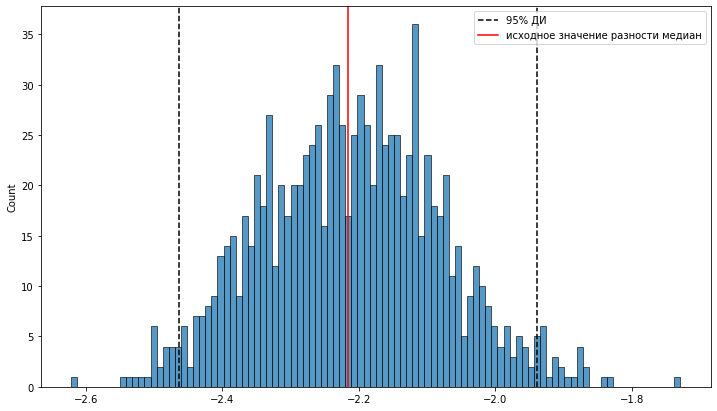

In [19]:
# строим бутстраповское распределение для разности медиан:

from sklearn.utils import resample

x = df[df['left']=='no']['avg_hrs_month']
y = df[df['left']=='yes']['avg_hrs_month']

median_no = x.median()
median_yes = y.median()

diff = median_no - median_yes

results = []

for i in range(1000):
    sample1 = resample(x)
    sample2 = resample(y)
    median1 = sample1.median()
    median2 = sample2.median()
    results.append(median1-median2)

results = pd.Series(results)

right_q = results.quantile(0.975)
left_q = results.quantile(0.025)
pval = 2*min(np.array([results > diff]).mean(), np.array([results < diff]).mean())

plt.figure(figsize=(12, 7))
sns.histplot(results, bins=100);
plt.axvline(right_q, ls='--', color='black', label='95% ДИ')
plt.axvline(left_q, ls='--', color='black')
plt.axvline(diff, color='red', label='исходное значение разности медиан')
plt.legend()

print('Статистика бутстрапа:')
print(f'исходно: {diff}')
print(f'смещение: {results.mean() - diff: .18f}')
print(f'станд. ошибка: {results.std()}')
print(f'95% ДИ: {left_q, right_q}')
print(f'p-value: {pval}')

Как показывает получившийся график, истинное значение разности медиан avg_hrs_month, когда left = no и left = yes, действительно, находиться в районе -2.2, так смещение и стандартная ошибка получившегося распределения ничтожно малы. 95% доверительный интервал также показывает, что истинное значение лежит в интервале от примерно -2.4 до -1.9. Поскольку 0 не входит в данный интервал (причем правый хвост далеко от нуля) можно смело сказать, что гипотеза о равенстве медиан для всей выборки отвергается в пользу альтернативной гипотезы о том, что медиана avg_hrs_month ушедших > медианы avg_hrs_month у оставшихся. 

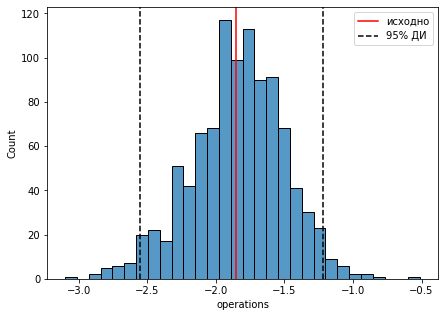

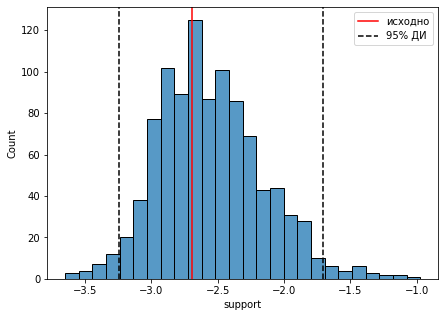

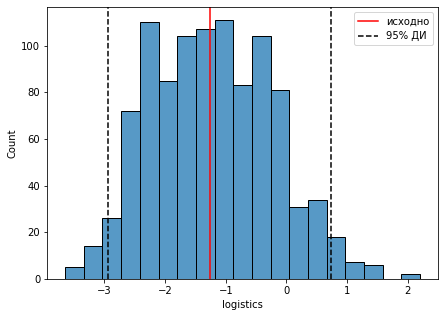

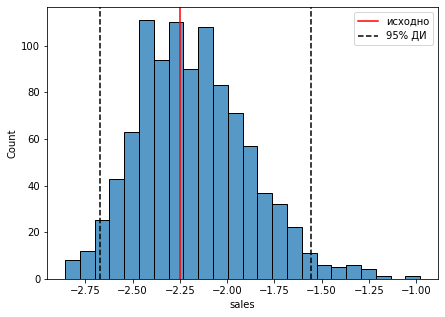

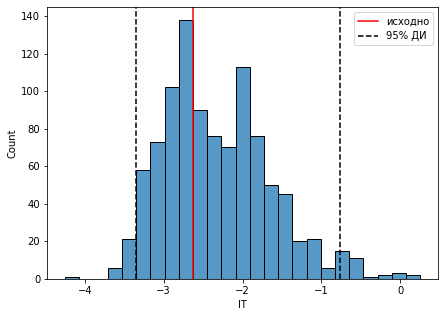

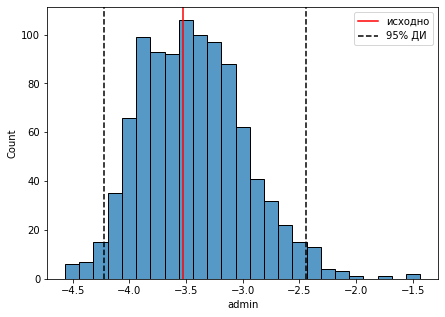

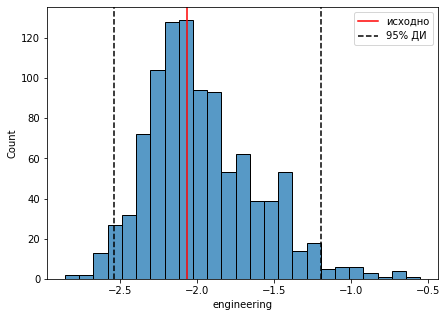

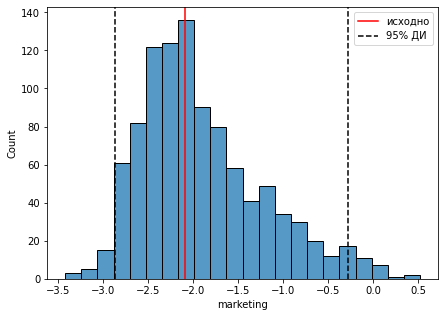

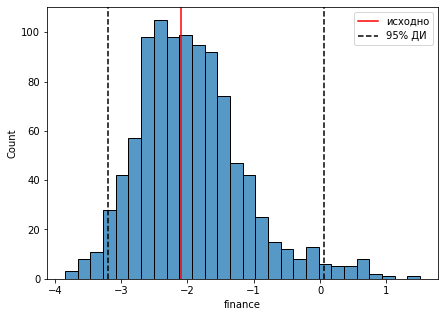

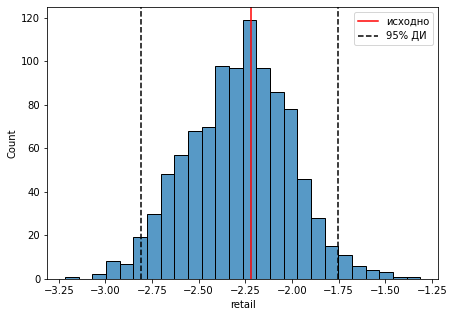

In [20]:
# Сделаем то же самое для каждого департамента:

results = {}
orig = {}

for dep in df['department'].unique():
    x = df[(df['department'] == dep) & (df['left']=='no')]['avg_hrs_month']
    y = df[(df['department'] == dep) & (df['left']=='yes')]['avg_hrs_month']

    median_no = x.median()
    median_yes = y.median()

    diff = median_no - median_yes
    
    orig[dep] = diff
    results[dep] = []
    
    for i in range(1000):
        sample1 = resample(x)
        sample2 = resample(y)
        median1 = sample1.median()
        median2 = sample2.median()
        results[dep].append(median1-median2)

results = pd.DataFrame(results)
orig = pd.Series(index=orig.keys(), data=orig.values())

right_q = results.quantile(0.975)
left_q = results.quantile(0.025)

for col in results.columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(results[col])
    plt.axvline(orig[col], color='red', label='исходно')
    plt.axvline(right_q[col], color='black', ls='--', label='95% ДИ')
    plt.axvline(left_q[col], color='black', ls='--')
    plt.legend();

In [21]:
bias = results.mean(axis=0) - orig
std = results.std()

print(f'Исходно:')
print(orig)
print(f'Смещение:')
print(bias)
print(f'Стандратное отклонение:')
print(std)
print(f'Правая граница 95% ДИ:')
print(right_q)

Исходно:
operations    -1.851899
support       -2.694547
logistics     -1.253882
sales         -2.250428
IT            -2.632805
admin         -3.523500
engineering   -2.069582
marketing     -2.090675
finance       -2.100649
retail        -2.220580
dtype: float64
Смещение:
operations     0.009709
support        0.141209
logistics      0.035332
sales          0.072560
IT             0.305691
admin          0.086928
engineering    0.101729
marketing      0.188467
finance        0.156318
retail        -0.062745
dtype: float64
Стандратное отклонение:
operations     0.342016
support        0.395830
logistics      1.009081
sales          0.292948
IT             0.678174
admin          0.458071
engineering    0.356722
marketing      0.680874
finance        0.801831
retail         0.275811
dtype: float64
Правая граница 95% ДИ:
operations    -1.219491
support       -1.703040
logistics      0.735568
sales         -1.554169
IT            -0.762029
admin         -2.439409
engineering   -1.195091
m

Далее на графиках мы построили 95% доверительный интервал, и ещё раз убедились в том, что в большенстве департаментов 0 действительно не входит в ДИ. Однако в таких департаментах, как "finance", "logistics" 0 вошёл в ДИ. Но вообщем и целом, можно сказать, что гипотеза о равенстве медиан для большинства департаментов действительно отвергается в пользу альтернативной гипотезы о том, что медиана avg_hrs_month ушедших > медианы avg_hrs_month у оставшихся.

### promoted и left

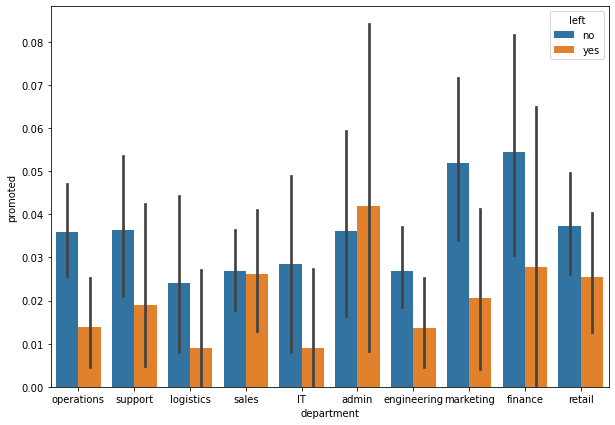

In [22]:
# Следующий график будет между promoted и left

plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='promoted', hue='left');

Вывод: данная столбчатая диаграмма показывает зависимость текучести кадров от продвижения по карьерной лестнице в различных департаментах, мы заметили следующую закономерность: тех работников, которые по итогу уволились, в большинстве департаментов реже повышали, чем работников, которые продолжили работать в этой компании. 
Давайте проверим гипотезу о том, что в  департаментах одинаково повышали и тех, и других. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_x - p_y = 0 \\
&H_1: \hspace{2mm} p_x - p_y > 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [4]:
df_p = pd.pivot_table(df, index='department', columns='left', values='promoted', aggfunc='value_counts').unstack()
df_p['%_promoted_no'] = df_p['no'][1] / (df_p['no'][1] + df_p['no'][0])
df_p['%_promoted_yes'] = df_p['yes'][1] / (df_p['yes'][1] + df_p['yes'][0])

hypothesis = 0

diff = df_p['%_promoted_no'] - df_p['%_promoted_yes']
    
var_1 = (df_p['%_promoted_no']*(1-df_p['%_promoted_no'])/(df_p['no'][0]+df_p['no'][1]))
var_2 = (df_p['%_promoted_yes']*(1-df_p['%_promoted_yes'])/(df_p['yes'][0]+df_p['yes'][1]))

df_p['p_value'] = 1-scs.norm.cdf((diff-hypothesis)/np.sqrt(var_1+var_2))

df_p

left           no      yes     %_promoted_no %_promoted_yes   p_value
promoted        0   1    0   1                                       
department                                                           
IT            239   7  109   1      0.028455       0.009091  0.082371
admin         293  11  114   5      0.036184       0.042017  0.607977
engineering  1050  29  431   6      0.026877       0.013730  0.038441
finance       278  16  105   3      0.054422       0.027778  0.098129
logistics     243   6  110   1      0.024096       0.009009  0.126952
marketing     530  29  238   5      0.051878       0.020576  0.008327
operations   1047  39  430   6      0.035912       0.013761  0.002632
retail       1030  40  459  12      0.037383       0.025478  0.100057
sales        1310  36  523  14      0.026746       0.026071  0.467039
support       504  19  208   4      0.036329       0.018868  0.079883

In [ ]:
# Проверим ту же гипотезу по всей выборке:


p_x = df[df['left'] == 'no']['promoted'].mean()
p_y = df[df['left'] == 'yes']['promoted'].mean()

n_x = df[df['left'] == 'no'].shape[0]
n_y = df[df['left'] == 'yes'].shape[0]

diff = p_x - p_y

var_1 = p_x*(1-p_x)/n_x
var_2 = p_y*(1-p_y)/n_y

print(f'p-value по всей выборке: {1 - scs.norm.cdf(diff/np.sqrt(var_1 + var_2)): .10f}')

Как видно, в большинтсве случаев мы не отвергаем нулевую гипотезу на уровне значимости 5%. Несмотря на это в некоторых департаментах мы все же отвергаем H0, так как p-value там очень маленькое. Такими департаментами являются: operations, marketing, engineering. В них можно говорить о том, что людей, которые не ушли, больше повышали.

Еще одним тестом, который можно провести в рамках той же гипотезы, является тест хи-квадрат независимости. 

In [ ]:
df_p = pd.pivot_table(df, index='department', columns='left', values='promoted', aggfunc='value_counts').unstack()
df_p

In [ ]:
from scipy.stats import chi2_contingency

statistics = {}
p_values = {}

for index in df_p.index:

    obs = np.vstack([np.array(df_p.loc[index]['no']), np.array(df_p.loc[index]['yes'])])
    statistic, pvalue, df, matrix = chi2_contingency(obs)

    statistics[index] = statistic
    p_values[index] = pvalue


df_p['chi2_statistic'] = statistics
df_p['p_value'] = p_values

df_p

In [ ]:
# тест хи-квадрат для всей выборки:

pr_no = df[df['left'] == 'no']['promoted'].value_counts()
pr_yes = df[df['left'] == 'yes']['promoted'].value_counts()

x = np.vstack([pr_no, pr_yes])

statistic, pvalue, df, matrix = chi2_contingency(x)

print(f'Cтатистика хи-квадрат для всей выборки: {statistic}')
print(f'p-value для всей выборки: {pvalue}')

Видим, что тест хи-квадрат показывает чуть другую картину, и теперь на уровне значимости 5% мы можем говорить о наличии неслучайности только в operations. Тем не менее и marketing, и engineering также имеют достаточно маленькое p-value, ровно как и значение p-value для всей выборки. 

### left и tenure

Вполне возможно, однако, что ушедшие из компании люди просто-напросто меньше прорабатывали в ней, поэтому их логично и меньше повышали. Давайте посмотрим на связь переменных left и tenure.

In [ ]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='tenure', hue='left')
plt.subplots(figsize=(10,7))
sns.histplot(data=df, x='tenure', hue='left');

Вывод: Столбчатая диаграмма показывает зависимость текучести кадров от количества лет, проработанных в компании, по каждому департаменту. По графикам видим, что ситуация как раз обратная. Из нее следует, что уволившиеся работники в некоторых департаментах проработали в компании столько же или даже чуть дольше, чем те, которые остались. Гистограмма по всей выборке, а не по конкретным департаментам, уже более наглядно показывает, что количество уволившихся сотрудников с годами, проработанных в компании, увеличивается. Поэтому проверим гипотезу о том, что решившие уйти в среднем прорабатывали в компании столько же лет, как и оставшиеся, против альтернативной гипотезы о том, что оставшиеся работают в компании дольше.

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x - \mu_y = 0 \\
&H_1: \hspace{2mm} \mu_x - \mu_y > 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [ ]:
df_2 = pd.pivot_table(data=df, index='department', columns='left', values='tenure', aggfunc=['mean', 'var', 'count'])
hypothesis = 0
mu_x = df_2['mean']['no']
mu_y = df_2['mean']['yes']
var_x = df_2['var']['no']
var_y = df_2['var']['yes']
n_x = df_2['count']['no']
n_y = df_2['count']['yes']

df_2['p_value'] = 1-scs.norm.cdf((mu_x - mu_y) / np.sqrt(var_x/n_x + var_y/n_y))
df_2

Столбец p-value говорит о том, что нет никаких оснований отвергать H0, то есть в среднем ушедшие и оставшиеся работали в компании одинаково.

А этот факт уже позволяет задуматься над теми результатами, которые мы получили в предыдущей гипотезе о взаимосвязи promoted и left. Так как теперь мы знаем, что две категории людей работали в среднем одно и то же количество лет в компании, но одних (ушедших) повышали меньше, переменная promoted скорее всего является достаточно важной.

### left и bonus

Посмотрим на признаки bonus и left

In [ ]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='bonus', hue='left');

Вывод: столбчатая диаграмма показывает зависимость текучести кадров от получения сотрудником бонусов за свою работу в каждом из департаментов. Мы заметили, что в некотрых департаментах (Sales, IT, admin, engineering, marketing) уволившиеся работники реже получали бонус. Давайте протестируем гипотезу о том, что ушедшие в среднем получали меньше бонусов. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x - \mu_y = 0 \\
&H_1: \hspace{2mm} \mu_x - \mu_y > 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [ ]:
df_4 = pd.pivot_table(data=df, index='department', columns='left', values='bonus', aggfunc=['mean', 'var', 'count'])
hypothesis = 0
mu_x = df_4['mean']['no']
mu_y = df_4['mean']['yes']
var_x = df_4['var']['no']
var_y = df_4['var']['yes']
n_x = df_4['count']['no']
n_y = df_4['count']['yes']

df_4['p_value'] = 1 - scs.norm.cdf((mu_x - mu_y) / np.sqrt(var_x/n_x + var_y/n_y))
df_4

К сожалению, статистически значимой связи обнаружить не удалось, так как везде p-value > 0.05. 

### left и review

In [ ]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='review', hue='left');

В данном случае столбчатая диаграмма показывает зависимость текучести кадров по всем департаментам от оценки, полученной в результате тестирования производительности. Можно увидеть следующую закономерность: по всем департаментам люди, которые по итогу уволились, имели более высокую оценку. А это значит, что нужно протестировать очередную гипотезу. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x - \mu_y = 0 \\
&H_1: \hspace{2mm} \mu_x - \mu_y < 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
df_5 = pd.pivot_table(data=df, index='department', columns='left', values='review', aggfunc=['mean', 'var', 'count'])
hypothesis = 0
mu_x = df_5['mean']['no']
mu_y = df_5['mean']['yes']
var_x = df_5['var']['no']
var_y = df_5['var']['yes']
n_x = df_5['count']['no']
n_y = df_5['count']['yes']

df_5['p_value'] = scs.norm.cdf((mu_x - mu_y) / np.sqrt(var_x/n_x + var_y/n_y))
df_5

Вполне ожидаемого, z-test показывает, что, действительно, имеет место разница между средними оценками review двух категорий и ушедшие работники имели более высокий review. Это говорит о том, что признак review, скорее всего, является важным в оценке целевой переменной. 

### Прочее

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='salary', hue='left');
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='department', hue='salary');

Вывод: столбчатая диаграмма показывает зависимость текучести кадров от получения сотрудником заработной платы. Согласно данным, выдающийся результат мы можем наблюдать в столбце со средней заработной платой. Так как работники удовлетворены суммой средней зп, у них нет стимула увольняться и они предпочитают продолжать работать. В общем, можно сказать, что вне зависимоти от зп, сотрудники решают оставаться и продолжать работать. Поэтому, результаты не очень релевантны относительно данного исследования. 

In [ ]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='satisfaction', hue='left')
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='left', y='satisfaction');

У satisfaction ничего интересного. 

# 4. Создание новых признаков 

С помощью knn создадим признак, который будет выражать вероятность того, что человек уйдет.

In [6]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [7]:
# подготовка данных к машинному обучению:

df_ml = df.copy()

# Кодируем некоторые категориальные данные вручную:

df_ml['left'] = df_ml['left'].replace({'no':0, 'yes':1}) # кодируем целевую переменную
df_ml['salary'] = df_ml['salary'].replace({'low':1, 'medium':2, 'high':3}) # кодируем переменную salary, так как она порядковая

# Остальные категориальные переменные кодируем с помощью OHE: 

df_ml = pd.get_dummies(df_ml)

df_ml

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,0,0,0,0,0,0,0,1,0,0,0
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,0,0,0,0,0,0,0,1,0,0,0
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,0,0,0,0,0,0,0,0,0,0,1
3,0,0.675158,4,3,8.0,0.440139,0,188.707545,0,0,0,0,0,1,0,0,0,0,0
4,0,0.676203,3,3,5.0,0.577607,1,179.821083,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,2,8.0,0.543641,0,188.155738,1,0,0,0,0,0,0,1,0,0,0
9536,0,0.746887,3,2,8.0,0.549048,0,188.176164,1,0,0,0,0,1,0,0,0,0,0
9537,0,0.557980,3,1,7.0,0.705425,0,186.531008,1,0,0,0,0,0,0,1,0,0,0
9538,0,0.584446,4,2,8.0,0.607287,1,187.641370,1,1,0,0,0,0,0,0,0,0,0


In [8]:
# Стандратизируем данные:

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

df_ml_norm = pd.DataFrame(norm.fit_transform(df_ml), columns=df_ml.columns)

df_ml_norm

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support
0,0.0,0.387781,0.333333,0.0,0.3,0.626759,0.0,0.321898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.640434,0.333333,0.5,0.4,0.443679,0.0,0.384368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.597896,0.333333,0.5,0.4,0.446823,0.0,0.442288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.529215,0.666667,1.0,0.6,0.440139,0.0,0.587823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.530729,0.333333,1.0,0.3,0.577607,1.0,0.286460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0.0,0.436215,0.666667,0.5,0.6,0.543641,0.0,0.569110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9536,0.0,0.633170,0.333333,0.5,0.6,0.549048,0.0,0.569802,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9537,0.0,0.359391,0.333333,0.0,0.5,0.705425,0.0,0.514011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9538,0.0,0.397747,0.666667,0.5,0.6,0.607287,1.0,0.551666,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier

y = df_ml_norm['left']
X = df_ml_norm.drop(columns='left')

knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X, y)

df_ml_norm['leaving_score'] = knn.predict_proba(X)[:, 1] # новая переменная

df_ml_norm

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,leaving_score
0,0.0,0.387781,0.333333,0.0,0.3,0.626759,0.0,0.321898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
1,0.0,0.640434,0.333333,0.5,0.4,0.443679,0.0,0.384368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.761905
2,0.0,0.597896,0.333333,0.5,0.4,0.446823,0.0,0.442288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.523810
3,0.0,0.529215,0.666667,1.0,0.6,0.440139,0.0,0.587823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.095238
4,0.0,0.530729,0.333333,1.0,0.3,0.577607,1.0,0.286460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0.0,0.436215,0.666667,0.5,0.6,0.543641,0.0,0.569110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667
9536,0.0,0.633170,0.333333,0.5,0.6,0.549048,0.0,0.569802,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.714286
9537,0.0,0.359391,0.333333,0.0,0.5,0.705425,0.0,0.514011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.619048
9538,0.0,0.397747,0.666667,0.5,0.6,0.607287,1.0,0.551666,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714


# 5. Машинное обучение

In [11]:
# разбиваем выборку на тренировочную (80%) и тестовую (20%)

y = df_ml_norm['left']
X = df_ml_norm.drop(columns='left')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,leaving_score
5746,0.0,0.296500,0.666667,1.0,0.6,0.486957,1.0,0.642946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.428571
7512,0.0,0.431905,0.666667,0.5,0.6,0.532100,0.0,0.623428,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.238095
7195,0.0,0.214678,0.333333,1.0,0.4,0.181083,0.0,0.393783,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.095238
758,0.0,0.634775,0.000000,0.0,0.4,0.375859,0.0,0.406987,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571
6008,0.0,0.527185,0.333333,0.5,0.6,0.405226,0.0,0.583325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,0.400402,0.666667,0.5,0.4,0.554945,0.0,0.405173,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.142857
7813,0.0,0.503172,0.666667,0.0,0.6,0.477037,0.0,0.634411,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
905,0.0,0.472720,0.666667,0.5,0.4,0.573064,0.0,0.404412,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.047619
5192,0.0,0.351250,0.333333,0.5,0.5,0.347974,0.0,0.527746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.095238


Будем делать 2 модели: Логистическую регрессию и Случайный лес:

### Логистическая регрессия

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

solver_list = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
params = dict(solver=solver_list)

clf_solver = GridSearchCV(logreg,
                         params,
                         scoring = 'roc_auc',
                         cv = 4)
clf_solver.fit(X_train, y_train)
best_solver = clf_solver.best_params_['solver']
best_solver

'lbfgs'

In [23]:
parametres = {'penalty': ['l1', 'l2'],
    'C'      : np.logspace(-3,3,7),
    'solver'  :[best_solver]}

In [24]:
clf = GridSearchCV(logreg,
                param_grid = parametres,
                scoring = 'roc_auc',
                cv = 4)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [25]:
logreg = LogisticRegression(C = 1.0,
                           penalty = 'l2',
                           solver ='newton-cg')
model_log = logreg.fit(X_train, y_train)
model_log.predict(X_test)

array([1., 0., 0., ..., 1., 0., 0.])

In [26]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

y_pred_log = model_log.predict(X_test)
p_pred_log = model_log.predict_proba(X_test)[:, -1] # вероятность 1


print(f'AUC-ROC: {roc_auc_score(y_test, p_pred_log)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_log)}')
print(f'precision: {precision_score(y_test, y_pred_log)}')
print(f'recall: {recall_score(y_test, y_pred_log)}')

AUC-ROC: 0.8856934724354139
accuracy: 0.8197064989517819
precision: 0.7611607142857143
recall: 0.5899653979238755


__Вывод:__ мы получичили довольно большее значение метрики ROC-AUC = 0.88. Делаем вывод о том, что это указывает на хорошую эффективность классификатора. 

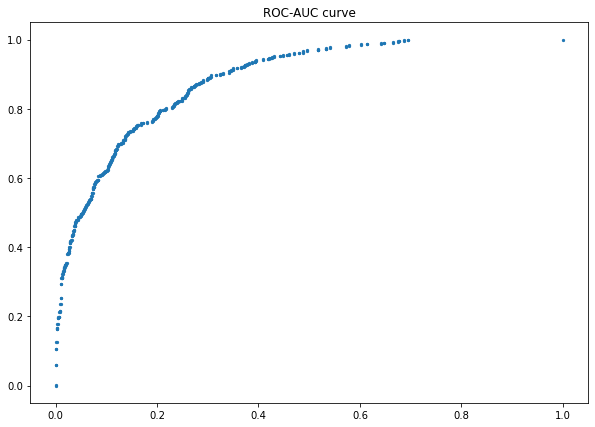

In [27]:
from sklearn.metrics import roc_curve

prob_log = model_log.predict_proba(X_test)[:, -1]

x, y, val = roc_curve(y_test, prob_log)

plt.figure(figsize=(10, 7))
plt.scatter(x, y, s=5)
plt.title('ROC-AUC curve');

Теперь давайте измерим важность признаков для модели логистической регрессии. Для оценки мы будем придерживаться следующей закономерности: чем больше вес по модулю у признака в модели, тем он важнее.

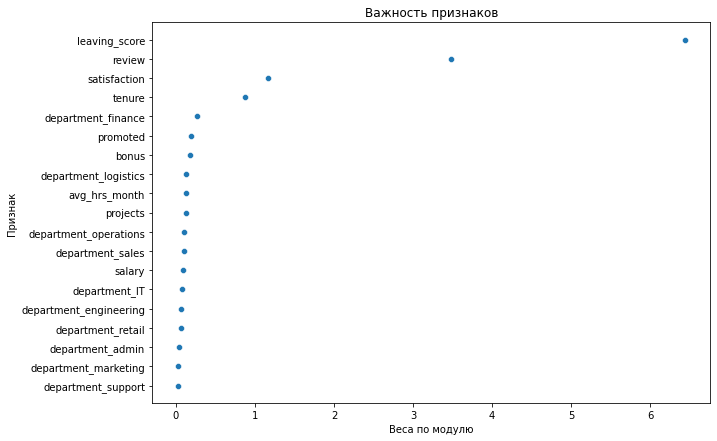

In [28]:
logreg_imp = pd.DataFrame({'Признак': X_train.columns, 'Веса по модулю': abs(logreg.coef_[0])})
logreg_imp = logreg_imp.sort_values(by='Веса по модулю', ascending=False)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=logreg_imp, x='Веса по модулю', y='Признак')
plt.title('Важность признаков');

__Вывод:__ Мы отсортировали признаки по весам и заметили, что наиболее важными признаками в нашей модели являются leaving_score и review.

### Случайный лес

In [ ]:
# Находим оптимальные параметры:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

min_samples_split = np.arange(2, 20)
max_depth = range(1, 20)

searcher = GridSearchCV(
    RandomForestClassifier(bootstrap=True, n_estimators=200), [{'min_samples_split': min_samples_split, 'max_depth': max_depth}], 
    scoring="roc_auc", cv=4
)

searcher.fit(X_train, y_train)

searcher.best_params_

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

rf = RandomForestClassifier(criterion='gini', bootstrap=True, n_estimators=200, max_depth=13,
                            min_samples_split=10, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
p_pred = rf.predict_proba(X_test)[:, -1] # вероятность 1


print(f'AUC-ROC: {roc_auc_score(y_test, p_pred)}')
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')

Получаем очень даже неплохие результаты.

In [ ]:
from sklearn.metrics import roc_curve

prob = rf.predict_proba(X_test)[:, -1]

x, y, val = roc_curve(y_test, prob)

plt.figure(figsize=(10, 7))
plt.scatter(x, y, s=5)
plt.title('ROC-AUC curve');

Теперь давайте посмотрим на важность признаков. Сделаем это двумя способами: посмотрим на "снижение Джини" и на "снижение точности". "Снижение Джини" измеряет важность признаков путем среднего снижения балла загрязненности Джини, то есть оно измеряет то, насколько включение переменной в состав улчшает чистоту узлов. "Снижение Джини" автоматически считается самим RandomForest и его можно достать, применив .feature_importances_. "Снижение точности" измеряет важность признаков путем измерения снижения точности модели, если значения переменной случайно перемешаны/перестановлены. Он не доступен в имплементации sklearn, поэтому его можно посчитать вручную. 

In [ ]:
# Код ниже взят из книги П. Брюса, Э. Брюса и П. Гедека "Практическая статистика для специалистов Data Science" (2-е издание)
# рассчитываем снижение точности

import collections

rf1 = RandomForestClassifier(criterion='gini', bootstrap=True, n_estimators=200, max_depth=13, min_samples_split=10)
scores = collections.defaultdict(list)

for i in range(3): # ищем снижение точности 3 раза, чтобы потом усреднить результат
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)
    rf1.fit(X_train_1, y_train_1)
    acc = accuracy_score(y_test_1, rf.predict(X_test_1)) # ищем изначальную accuracy (точность) модели
    
    for column in X.columns: # выбираем каждую колонку из датасета
        X_t = X_test_1.copy()
        X_t[column] = np.random.permutation(X_t[column].values) # перемешиваем в этой колонке данные
        shuff_acc = accuracy_score(y_test_1, rf.predict(X_t)) # проверяем accuracy с перемешанной колонкой
        scores[column].append((acc-shuff_acc)/acc) # смотрим относительное изменение точности между изначальной и перемешанной accuracy

In [ ]:
# Визуализируем полученный результат:

feature_importance = pd.DataFrame({
    'Признак': X.columns, 
    'Снижение точности': [np.mean(scores[column]) for column in X.columns],
    'Снижение Джини': rf.feature_importances_
})

feature_importance = feature_importance.sort_values('Снижение точности', ascending=False)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=feature_importance, x='Снижение точности', y='Признак')
plt.title('Важность признаков')
plt.figure(figsize=(10, 7))
sns.scatterplot(data=feature_importance, x='Снижение Джини', y='Признак');

Выводы: Видим очень интересную картину. Во-первых, "снижение точности" и "снижение Джини" по-разному определяют важность признаков. Для первого способа (снижение точности) самым важным признаком является avg_hrs_month, в то время как для второго - leaving_score. Однако оба способа показывают, что самыми важными признаками для модели являются: avg_hrs_month, leaving_score, satisfaction, review. В том, что leaving_score является важным признаком нет абсолютно ничего удивительного, ведь она является предсказаниями другой модели (knn), поэтому вполне ожидаемо, что модель рандомного леса заметила эту важность. Касаемо avg_hrs_month и review, нам удалось статистически доказать, что 1) медиана avg_hrs_month у ушедших была больше, чем у тех, кто не ушел, другими словами, ушедшие больше работали, и 2) среднее значение review у ушедших было выше, то есть ушедшие были "лучшими" работниками. Однако насчет satisfaction мы не смогли выявить ничего интересного, тем не менее модель утверждает, что этот признак очень важен для определения того уйдет ли человек или нет. Выше мы также предположили, что promoted может быть важной переменной, так как по всей выборке и в некоторых департаментах в частности, мы отвергли гипотезу о равенстве процента повышений в группах ушедших и не ушедших. Тем не менее этот признак оказался один из наименее значимых, если смотреть на графики выше. Возможно, причина этого - дисбаланс в категориях, потому что людей, которых повышали (в % соотношении) и там, и там очень немного. 

__Вывод:__ Теперь мы можем сравнить какие признаки считаются наиболее важными согласно двум моделям LogisticRegression и RandomForest.  "Снижение Джини" и LR считают одними из самых важных признаков leaving_score и review. У  "Снижение точности" и LR разные взгляды на важность признаков. Согласно первой модели наиболее важными являются avg_hrs_month и satisfaction, а согласно LR - review и leaving_score.

Подводя итоги нашей работы, мы бы хотели порекомендовать работодателям обращать внимание на то, сколько часов сотрудник  работает в месяц. Возможно, следует сделать сотрудникам более нормированный рабочий день, предоставлять больше часов отдыха. Также стоит обратить внимание на уровень удовлетворенности работников условием труда. Было бы здорово, чтобы у сотрудников была возможность получать медицинскую страховку, возмещение трат на дорогу до работы, и проходить курсы повышения квалификации. Также  людям с высоким review стоит предоставлять возможноть продвижнния по карьерной лестнице, иначе работники не видят перспектив в компании и склонны увольняться.

<center>
<img src="https://cs12.pikabu.ru/post_img/big/2019/06/28/6/156171083816913719.png">
   

</center>